<a href="https://colab.research.google.com/github/dan-santos/data-science/blob/master/Face%20Recognizer/Face_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**


---

Conforme já falei um pouco em um [outro notebook](https://github.com/dan-santos/data-science/blob/master/Color%20Recognizer/Color_Recognizer.ipynb), com o grande *boom* da ciência de dados, muitas de suas vertentes passaram a ocupar nosso cotidiano das mais variadas formas. Quando começaram os primeiros estudos científicos sobre Big Data, Aprendizado de Máquina, Inteligência Artificial e Visão Computacional, nós tinhamos toda a base matemática e teórica de como tais conceitos seriam aplicados no mundo real, porém, ainda não tínhamos capacidade computacional para nem sequer simular pequenos cenários com essas práticas. No entanto, durante toda a guerra fria e, posteriormente juntamente à popularização dos computadores pessoais pelo mundo nos anos 90/2000, a tecnologia que envolvia o hardware sofreu uma espantosa evolução e conseguiu chegar "ao mesmo nível de evolução" que a parte lógica dos computadores, isto é, o software. Tal fato explica o porquê do conceito de Data Science ter ficado tão famoso agora, mesmo que os seus [primeiros ensaios conceituais já tenham mais de 50 anos](http://courses.csail.mit.edu/18.337/2015/docs/50YearsDataScience.pdf).

Uma das vertentes mais usadas no mundo de hoje que abrange desde nossos smartphones até sistemas de segurança das principais potencias e instituições do mundo é a detecção facial. Basicamente, as câmeras não só conseguem identificar faces humanas em tempo real, mas também conseguem literalmente identificar quem é a pessoa em questão. Tudo isso é feito comparando os traços faciais da pessoa na imagem com as faces já registradas na base de dados da instituição/Estado.

Apesar de se tratar de uma tecnologia totalmente abstrata e avançada, na verdade, não é tão difícil quanto você pensa fazer o seu próprio algoritmo que consegue não só identificar faces em um vídeo, mas também saber exatamente de quem é aquela face. Neste notebook faremos isso usando Python e algumas das suas principais bibliotecas!

# **Hora de codar!**

---
## **Preparando o ambiente**
Para construirmos nosso algoritmo de reconhecimento facial, precisaremos importar as seguintes bibliotecas para o nosso notebook/projeto:



*   [OpenCV](https://opencv.org/)
*   [Numpy](https://numpy.org/)
*   [CMake](https://cmake.org/)
*   [face-recognition](https://pypi.org/project/face-recognition/)

Aqui, as duas primeiras bibliotecas já são velhas conhecidas para você da área de dados, ou senão, aposto que você já deve ter ao menos ouvido falar delas. De qualquer forma, vale a visita no site de cada uma :)

Já a biblioteca CMake funciona como um pré-requisito para que a última biblioteca - a que de fato irá fazer o reconhecimento facial - consiga funcionar corretamente.

Para instalar tais bibliotecas no seu projeto local, abra o terminal e digite o seguinte comando pip:





In [ ]:
pip install cmake face_recognition numpy opencv-python

Após fazer o download, vamos importar elas para o nosso projeto. Porém, atenção: a biblioteca `face_recognition` só irá ser importada se o seu notebook estiver com o acelerador de hardware selecionado na opção GPU.

In [ ]:
import face_recognition
import cv2  
import numpy as np  

# python libraries
import os  
import glob

## Treinando o algoritmo

Para fazer isso, vou pegar a a imagem de algumas pessoas famosas apenas para ter alguma massa de testes, mas você pode pegar imagens de quem você quiser para seu projeto pessoal. Além disso, em cada foto eu vou nomear o arquivo com o nome da pessoa separado por hífen na forma `exemplo-de-nome.jpg` e coloquei-os na pasta `/faces` do meu notebook.

In [ ]:
faces_encodings = list()
faces_names = list()

# pics of faces
path = '/content/drive/My Drive/Colab Notebooks/Face Recognizer/faces/'

# tacking all jpeg files in folder
list_of_files = [f for f in glob.glob(path+'*.jpeg')]

number_files = len(list_of_files)

#file names
names = list_of_files.copy()

Note que a lista `names` contem o nome do arquivo juntamente com o seu caminho inteiro (variavel `path`) e extensão. Mas, não queremos exibir tudo isso, queremos exibir apenas o nome da pessoa. Para isso, vamos fazer uma função que elimina esses ruídos do nome.

In [ ]:
def get_person_name(file_name):
    # removing the file path
    file_name = file_name.replace(path, '')

    # removing the file extension
    file_name = file_name.split('.')[0]

    # if file name contains '-', replace it to a blank space
    if '-' in file_name:
        file_name = file_name.replace('-', ' ')
    return file_name

Agora, basta ensinarmos o nosso algoritmo a identificar as faces e associá-las a um determinado nome.


In [ ]:
for i in range(number_files):  
    globals()['image_{}'.format(i)] = face_recognition.load_image_file(list_of_files[i])  
    globals()['image_encoding_{}'.format(i)] = face_recognition.face_encodings(globals()['image_{}'.format(i)])[0]  
    
    # creating array of know names
    faces_encodings.append(globals()['image_encoding_{}'.format(i)])    
    faces_names.append(get_person_name(names[i]))

## **Testando**

Bom trabalho! Já estamos quase acabando. Para testar se o nosso código está funcionando, vamos habilitar a webcam do nosso computador para ver como nosso algoritmo vai se sair.
Como nesse passo precisamos acessar recursos do sistema do computador, ele não irá executar nada se você rodá-lo direto no notebook, ou seja, você vai precisar rodar esse trecho localmente na sua máquina.


In [ ]:
face_locations = list()
face_encodings = list()
face_names = list()  

# auxiliar variable
process_this_frame = True

video_capture = cv2.VideoCapture(0)

while True:  
    ret, frame = video_capture.read()
    print('{} - {}'.format(ret, frame))    
    small_frame = cv2.resize(frame, (0, 0), fx = 0.25, fy = 0.25)    
    rgb_small_frame = small_frame[:, :, ::-1]

    if process_this_frame:  
        face_locations = face_recognition.face_locations(rgb_small_frame)  
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)        
        face_names = list()

        for face_encoding in face_encodings:  
            matches = face_recognition.compare_faces(faces_encodings, face_encoding)  
            name = 'Unknown'            
            face_distances = face_recognition.face_distance(faces_encodings, face_encoding)  
            best_match_index = np.argmin(face_distances)

            if matches[best_match_index]:  
                name = faces_names[best_match_index]            
                face_names.append(name)
                process_this_frame = not process_this_frame # display the results  

    for (top, right, bottom, left), name in zip(face_locations, face_names): 
        # draw a rectangle around the face 
        top *= 4  
        right *= 4  
        bottom *= 4  
        left *= 4  

        # Input text label with a name below the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)  
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)  
        font = cv2.FONT_HERSHEY_DUPLEX 

        # Display the resulting image
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    cv2.imshow('Video', frame) 

    # Hit 'q' on the keyboard to quit! 
    if cv2.waitKey(1) & 0xFF == ord('q'):  
        break

Pronto! Você acabou de construir um algoritmo de computação visual que reconhece qualquer rosto, basta você ensiná-lo antes!

# **Resultados**

---
Para fins expositivos, a seguir estão algumas imagens dos meus testes :)
E olha só que legal: Além do nosso algoritmo ser capaz de reconhecer os rostos das fotos de treino, ele também consegue reconhecê-los em outras fotos, mesmo quando a pessoa está utilizando adereços.

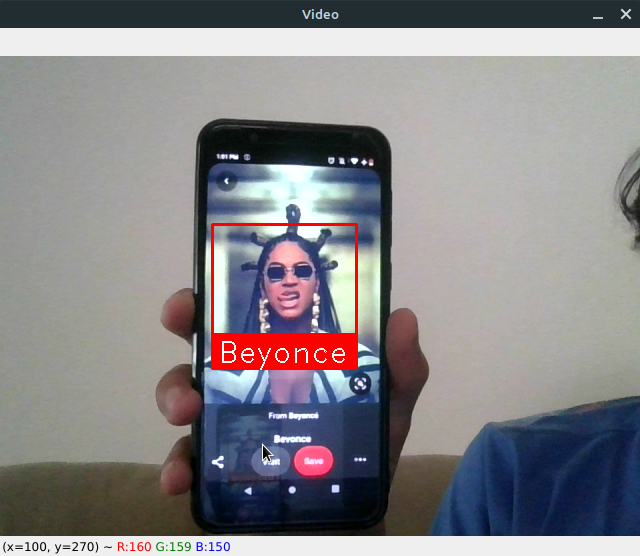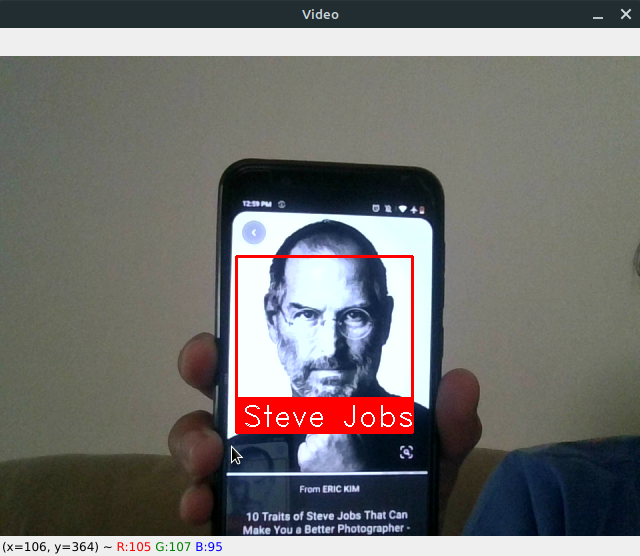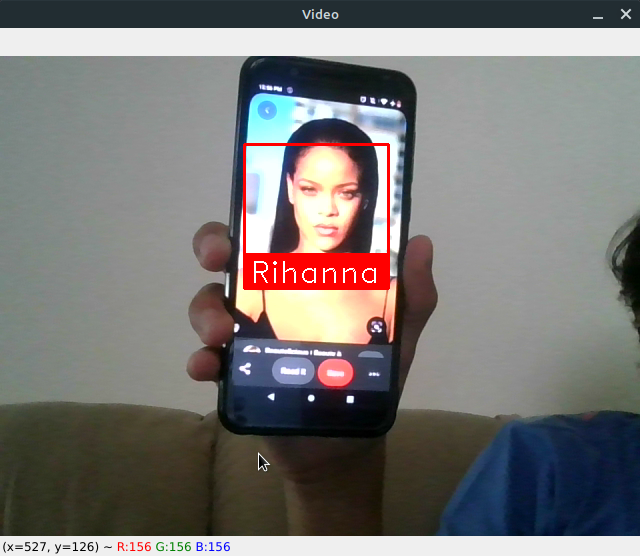


## **Materiais de apoio**

* https://towardsdatascience.com/building-a-face-recognizer-in-python-7fd6630c6340

* https://towardsdatascience.com/supervised-vs-unsupervised-learning-14f68e32ea8d

* https://stackoverflow.com/questions/63394119/how-do-i-import-face-recognition-in-google-colaboratory

* https://github.com/dan-santos/data-science/blob/master/Color%20Recognizer/Color_Recognizer.ipynb

* http://courses.csail.mit.edu/18.337/2015/docs/50YearsDataScience.pdf

